# INTRODUCCION

¿Cómo representar funciones de 2 variables f(x,y) en python?



## Ejemplo 1-. Representación de una función

Representar la función  $f(x,y)=-\sqrt{x^2+y^2}$

con $-3 \leq x \leq 3$ y $-3 \leq y \leq 3$.

### 1. Cargar los paquetes y módulos necesarios

* Los paquetes contienen distintos módulos, y cada módulo contendrá código (funciones, clases).
* Para importar un **paquete** usamos "import", y seguido de as tenemos el "alias".
* Para importar una **clase** particular de un módulo escribirmos from y luego la clase que queremos importar


In [2]:
import numpy as np # -> permite trabajar con funciones matemáticas
import matplotlib.pyplot as plt # -> permite crear figuras 3D
from mpl_toolkits.mplot3d import Axes3D # -> Herramientas para crear gráficas 3D

import plotly.graph_objects as go # -> Para que los gráficos sean interactivos

Si estamos programando en python (y no en un notebook), puede ser útil utilizar la instrucción:

```python
plt.close("all")
```

para que cada vez que ejecutemos el archivo, se nos cierren todos los gráficos que se hayan ido creando.
En un notebook esta orden no tiene sentido.

### 2. Creamos el objeto figura

* Creamos el objeto ejes (clase Axes3D), y en el constructor de la clase tenemos que pasarle el objeto figura
* Añadimos los ejes.
* No podemos interactuar con la gráfica creada

In [ ]:
# creamos la figura
figura = plt.figure()

# creamos los ejes 3D
ejes = Axes3D(figura, auto_add_to_figure=False)

# añadimos los ejes 3D a la figura
figura.add_axes(ejes)


* Añadimos la etiqueta de los ejes, llamando al método set_xlabel, etc

In [ ]:
# etiquetamos los ejes 3D a la figura
ejes.set_xlabel("x")
ejes.set_ylabel("y")
ejes.set_zlabel("z")
ejes.zaxis.labelpad = -1.5

figura

### 3. Representar una función

* creamos vectores de valores equiespaciados de -3 a 3.
* metodo linspace del objeto no.
* cuantos más elementos mejor saldrá la representación

In [ ]:
# creamos vectores de valores equiespaciados para "x" e "y"
x = np.linspace(-3,3,30)
y = np.linspace(-3,3,30)

* podemos observar los valores tanto como output de python, como en "variables" de Google Colab:

In [ ]:
x

* Faltan los x,y procedentes de las combinaciones de cada x con cada y.
* Meshgrid tiene como parámetros de entrada estos vectores que hemos creado, y devuelve X,Y, que son matrices.

In [ ]:
# obtenemos los puntos (x,y)
[X,Y] = np.meshgrid(x,y)

X

* Si inspeccionamos estas matrices, observamos que la matriz X es el vector x repetido por filas
* X se repite tantas veces que nos diga el vector y (va desde la fila 0 hasta la 29)
* De forma equivalente, la Y es el vector y minúscula repetido en columnas el tamaño que tenga el vector x.

Creamos nuestra función $z=f(x,y)$. Para ello necesitamos nuestra matrices X, Y.

In [ ]:
Z= -np.sqrt((X**2+Y**2))

Representamos la función en forma de rejilla:

In [ ]:
ejes.plot_wireframe(X, Y, Z, linewidth=0.5, color="royalBlue")

figura

Representamos la función sólida:

In [ ]:
# representamos la función z=f(x,y) en forma "sólida"
ejes.plot_surface(X, Y, Z, cmap="viridis")


figura

Hasta este momento no hemos podido interactuar.
Para que nuestra figura sea interactiva, haremos:

In [ ]:
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="Viridis")])

fig

## Ejemplo 2 -. Representación de una esfera


Representar la esfera de centro $(0,0,0)$ y radio 3.

* En general, la esfera de centro $(x_0,y_0,z_0)$ y radio R:

$$(x-x_0)^2+(y-y_0)^2 + (y-y_0)^2 + (z-z_0)^2 = R^2$$


* Por tanto, la esfera de centro $(0,0,0)$ y radio 3:   $$x^2+y^2+z^2=3^2$$

* La superficie de una esfera la podemos expresar como funciones $f(x,y)$ despejando la $z$: 
$$
z=f(x,y)=\underset{-}{\overset{+}{}} \sqrt{9-x^2-y^2}
$$
Esta sería la expresión en coordenadas cartesianas, pero no es la mejor solución, dado que necesitaremos dos superficies la raíz positiva y la raíz negativa.

* Una opción más adecuada es expresarla en coordenadas esféricas, lo que supone:

$$x=x_0+R\cos(u)\sin(v)$$
$$y=y_0+R\sin(u)\sin(v)$$
$$z=z_0+R\cos(v) $$

$$0 \leq u \leq 2\pi, 0 \leq v \leq \pi $$

* En nuestro caso concreto:
$$x=3\cos(u)\sin(v)$$
$$y=3\sin(u)\sin(v)$$
$$z=3\cos(v) $$

$$0 \leq u \leq 2\pi, 0 \leq v \leq \pi $$

Esto sería lo que vamos a representar aqui.

### 1. Creamos la figura y etiquetamos los ejes (como en el anterior ejemplo)

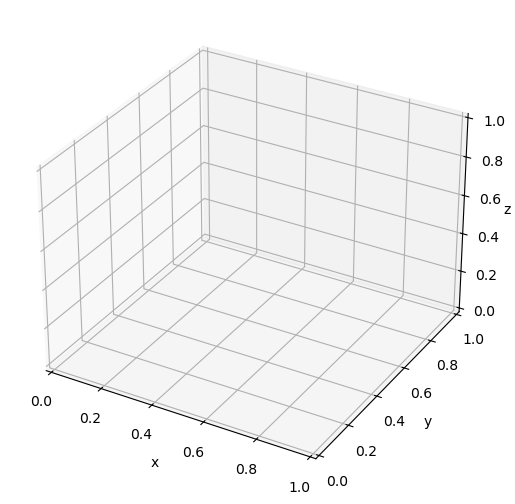

In [5]:
# creamos la figura
figura2 = plt.figure()

# creamos los ejes 3D
ejes2 = Axes3D(figura2, auto_add_to_figure=False)

# añadimos los ejes 3D a la figura
figura2.add_axes(ejes2)


# etiquetamos los ejes 3D a la figura
ejes2.set_xlabel("x")
ejes2.set_ylabel("y")
ejes2.set_zlabel("z")
ejes2.zaxis.labelpad = -1.5


Para que que la representación no salga deformada y mantenga la escala:

In [8]:
ejes2.set_box_aspect([1,1,1])

### 2. Creamos los parámetros equiespaciados para $u$ y $v$ y los puntos:

In [9]:
u = np.linspace(0, 2*np.pi, 32)
v = np.linspace(0, np.pi , 32)

#Obtenemos los puntos (u,v)
[U,V] = np.meshgrid(u,v)



Obtenemos los puntos (x,y,z):

In [10]:
#Radio de la esfera
R=3

#Obtenemos los puntos considerando las ecuaciones paramétricas
X=R*np.cos(U)*np.sin(V)
Y=R*np.sin(U)*np.sin(V)
Z=R*np.cos(V)

### 3. Representamos la gráfica

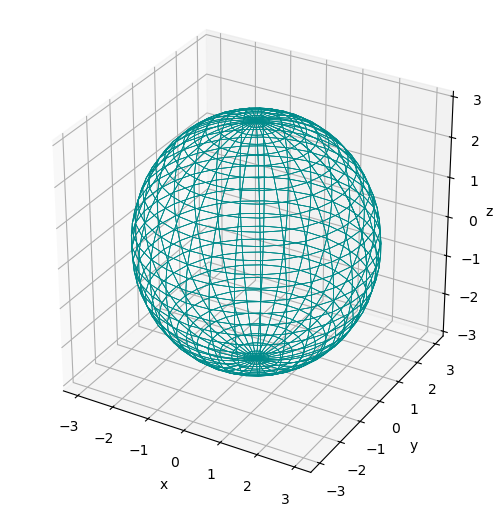

In [14]:
ejes2.plot_wireframe(X,Y,Z, linewidth=0.5, color="darkcyan")

figura2

In [ ]:
# Para que sea interactivo y muestre las curvas de nivel:
fig2 = go.Figure(
    data=[
        go.Surface(
            x=X, y=Y, z=Z,
            showscale=False,
            contours = {
                "x": {"show": True, "color": "black", "width": 1},
                "y": {"show": True, "color": "black", "width": 1},
                "z": {"show": True, "color": "black", "width": 1}
            }
        )
    ]
)

fig2

## Ejemplo 3. Funciones definidas a trozos

Representar

$$
f(x,y) = 
\begin{cases}
2+x-y
& \text{si } y \geq x \\
2 & \text{si } y < x
\end{cases}
$$

### 1. Creamos la figura y etiquetamos los ejes (como en los ejemplos anteriores)

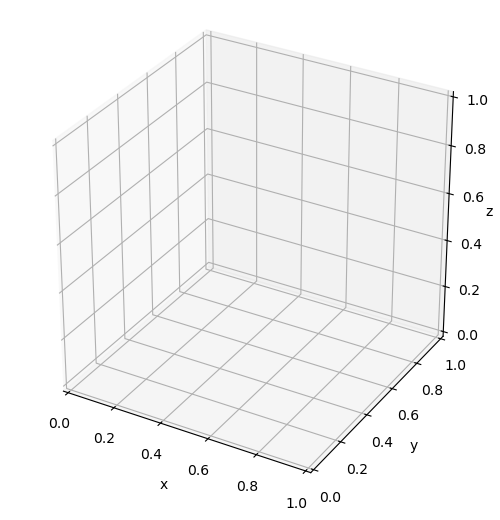

In [19]:
# creamos la figura
figura3 = plt.figure()

# creamos los ejes 3D
ejes3 = Axes3D(figura3, auto_add_to_figure=False)

# añadimos los ejes 3D a la figura
figura3.add_axes(ejes3)


# etiquetamos los ejes 3D a la figura
ejes3.set_xlabel("x")
ejes3.set_ylabel("y")
ejes3.set_zlabel("z")
ejes3.zaxis.labelpad = -1.5

# Para evitar deformaciones:
ejes3.set_box_aspect([1,1,1])



### 2. Definimos la función a trozos

In [20]:
def f(x,y):
    return np.select([y >= x, y<x,], [2+x-y,2])

In [21]:
#creamos los puntos equiespaciados:
x = np.linspace(-2,2,64)
y = np.linspace(-2,2,64)

# Obtenemos los puntos (x,y)
[X,Y] = np.meshgrid(x,y)

#Creamos la funzión Z:
Z=f(X,Y)

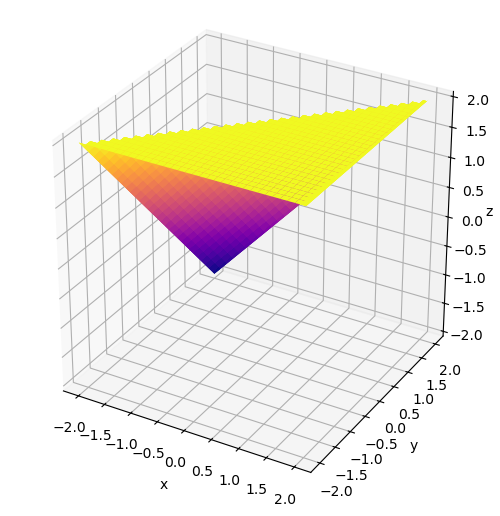

In [24]:
ejes3.plot_surface(X,Y,Z, cmap="plasma")
figura3

Para que sea interactivo:

In [26]:
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="plasma")])

fig